# 問1 単回帰分析

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
x = [10, 8, 12, 8, 11, 16, 17, 20, 15, 13]
y = [30, 22, 34, 21, 27, 40, 42, 50, 41, 33]

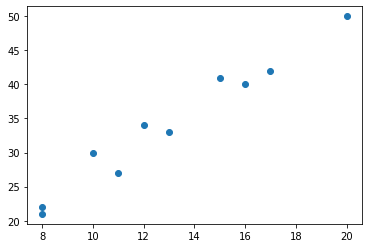

In [3]:
plt.scatter(x, y)
plt.show()

### 1. 長さxの平均値、重さyの平均値

In [4]:
x_bar = np.mean(x)
x_bar

13.0

In [5]:
y_bar = np.mean(y)
y_bar

34.0

### 2. 長さxの平方和、長さと重さの偏差積和

In [6]:
S_xx = sum([i**2 for i in x]) - sum(x)**2/len(x)
S_xx

142.0

In [7]:
S_xy = sum([i * j for i, j in zip(x, y)]) - sum(x)*sum(y)/len(x)
S_xy

327.0

### 3. 回帰方程式y=ax+bの係数a、切片bの値

In [8]:
a = S_xy / S_xx
a

2.3028169014084505

In [9]:
b = y_bar - a * x_bar
b

4.063380281690144

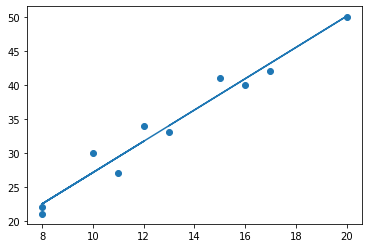

In [10]:
y_hat = [a * x + b for x in x]
plt.scatter(x, y)
plt.plot(x, y_hat)
plt.show()

### 4. 重さyの平方和、回帰による平方和、残差平方和

In [11]:
S_yy = sum([i**2 for i in y]) - sum(y)**2/len(y)
S_yy

784.0

In [12]:
S_R = S_xy**2 / S_xx
S_R

753.0211267605633

In [13]:
S_e = S_yy - S_R
S_e

30.978873239436666

### 5. 寄与率

In [14]:
S_R / S_yy

0.9604861310721471

目的変数yの変動のうち、96.0%が回帰直線による変動として説明できる。

### 6. yの自由度、回帰の自由度、残差の自由度

In [15]:
phi_yy = len(y)- 1
phi_R = 1
phi_e = phi_yy - phi_R
phi_yy, phi_R, phi_e

(9, 1, 8)

### 7. 回帰の平均平方、残差の平均平方、F検定

In [16]:
V_R = S_R / phi_R
V_e = S_e / phi_e
V_R, V_e

(753.0211267605633, 3.8723591549295833)

In [17]:
F0 = V_R / V_e
F0

194.4605592180038

In [18]:
alpha = 0.05
upper_cv = stats.f.ppf(1-alpha, 1, 8) #片側検定であることに注意
upper_cv

5.317655071578714

F0 > upper_cv　なので有意水準5%で有意である。<br>
よって、回帰には意味がある。

### 8. 回帰係数の検定

In [19]:
alpha = 0.05

In [20]:
t0 = (a - 0) / np.sqrt(V_e / S_xx)
t0

13.944911588748198

In [21]:
lower_cv = stats.t.ppf(alpha/2, df=phi_e)
upper_cv = stats.t.ppf(1-alpha/2, df=phi_e)
lower_cv, upper_cv

(-2.306004135033371, 2.3060041350333704)

t0 > upper_cv　なので帰無仮説H0は棄却される。<br>
よって、ネジの長さと重さには関係がある（回帰係数は0ではない）。

# 問2 データの種類

### ダミー変数を用いた回帰

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [56]:
data = load_diabetes()

In [57]:
df_X = pd.DataFrame(data.data, columns=data.feature_names)
df_y = pd.DataFrame(data.target, columns=["y"])
df = pd.concat([df_X, df_y], axis=1)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [58]:
df2 = df[["bmi", "sex", "y"]]
df2

,bmi,sex,y
0,0.061696,0.050680,151.0
1,-0.051474,-0.044642,75.0
2,0.044451,0.050680,141.0
3,-0.011595,-0.044642,206.0
4,-0.036385,-0.044642,135.0
...,...,...,...
437,0.019662,0.050680,178.0
438,-0.015906,0.050680,104.0
439,-0.015906,0.050680,132.0
440,0.039062,-0.044642,220.0


In [59]:
df2["sex"].unique()

array([ 0.05068012, -0.04464164])

ダミー変数化済みになっている

In [60]:
X = df2[["bmi", "sex"]]
y = df2["y"]

In [61]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

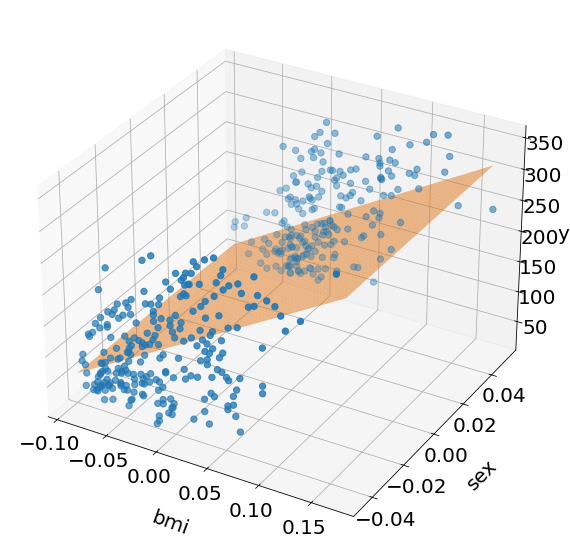

In [62]:
cmap = plt.get_cmap("tab10") 
plt.rcParams["font.size"] = 20
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(111, projection='3d')
ax1.set_xlabel("bmi", labelpad=20, rotation=-20)
ax1.set_ylabel("sex", labelpad=20, rotation=45)
ax1.set_zlabel("y", labelpad=5, rotation=0)
ax1.scatter(df2["bmi"], df2["sex"], df2["y"], s=40)

X_array, Y_array = np.meshgrid(np.arange(min(df2["bmi"]), max(df2["bmi"]), 0.001), 
                   np.arange(min(df2["sex"]), max(df2["sex"]), 0.001))
Z_array = model.coef_[0] * X_array + model.coef_[1] * Y_array + model.intercept_
ax1.plot_surface(X_array, Y_array, Z_array, alpha = 0.5, color=cmap(1))
plt.show()

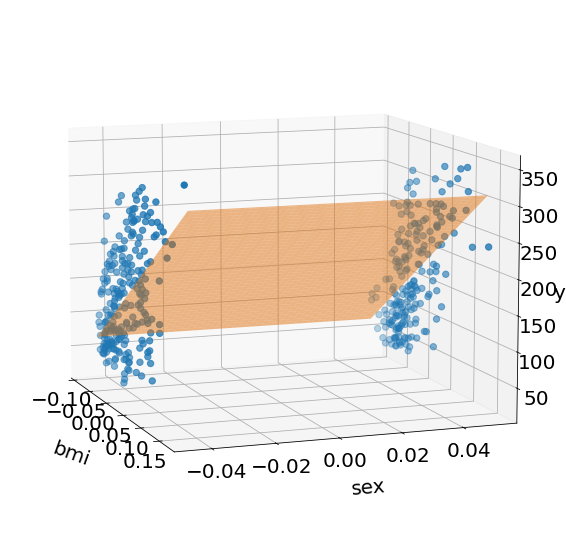

In [63]:
cmap = plt.get_cmap("tab10") 
plt.rcParams["font.size"] = 20
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(111, projection='3d')
ax1.set_xlabel("bmi", labelpad=20, rotation=-20)
ax1.set_ylabel("sex", labelpad=20, rotation=5)
ax1.set_zlabel("y", labelpad=3, rotation=0)
ax1.scatter(df2["bmi"], df2["sex"], df2["y"], s=40)
ax1.view_init(elev=10, azim=-20)

X_array, Y_array = np.meshgrid(np.arange(min(df2["bmi"]), max(df2["bmi"]), 0.001), 
                   np.arange(min(df2["sex"]), max(df2["sex"]), 0.001))
Z_array = model.coef_[0] * X_array + model.coef_[1] * Y_array + model.intercept_
ax1.plot_surface(X_array, Y_array, Z_array, alpha = 0.5, color=cmap(1))
plt.show()

In [64]:
print("切片: ", model.intercept_)
print("bmiの係数: ", model.coef_[0])
print("sexの係数: ", model.coef_[1])

切片:  152.13348416289617
bmiの係数:  950.6781385437346
sexの係数:  -14.097759035956361


### 多重共線性

In [65]:
df3 = df2.copy()
df3["bmi_2"] = df3["bmi"].map(lambda x: round(2 * x, 3))

In [66]:
df3

,bmi,sex,y,bmi_2
0,0.061696,0.050680,151.0,0.123
1,-0.051474,-0.044642,75.0,-0.103
2,0.044451,0.050680,141.0,0.089
3,-0.011595,-0.044642,206.0,-0.023
4,-0.036385,-0.044642,135.0,-0.073
...,...,...,...,...
437,0.019662,0.050680,178.0,0.039
438,-0.015906,0.050680,104.0,-0.032
439,-0.015906,0.050680,132.0,-0.032
440,0.039062,-0.044642,220.0,0.078


In [67]:
df3.corr()

,bmi,sex,y,bmi_2
bmi,1.000000,0.088161,0.586450,0.999996
sex,0.088161,1.000000,0.043062,0.088262
y,0.586450,0.043062,1.000000,0.586588
bmi_2,0.999996,0.088262,0.586588,1.000000


In [68]:
X2 = df3[["bmi", "sex", "bmi_2"]]
y2 = df3["y"]

In [69]:
model2 = LinearRegression()
model2.fit(X2, y2)

LinearRegression()

In [70]:
print("切片: ", model2.intercept_)
print("bmiの係数: ", model2.coef_[0])
print("bmi_2の係数: ", model2.coef_[2])
print("sexの係数: ", model2.coef_[1])

切片:  152.25526395933298
bmiの係数:  -25962.416182883822
bmi_2の係数:  13456.667506938176
sexの係数:  -16.823980353059596


In [71]:
# bmi_2を追加する前の回帰係数
print("切片: ", model.intercept_)
print("bmiの係数: ", model.coef_[0])
print("sexの係数: ", model.coef_[1])

切片:  152.13348416289617
bmiの係数:  950.6781385437346
sexの係数:  -14.097759035956361


In [72]:
new = pd.DataFrame({"bmi": [-0.070000], 
                    "sex": [-0.044642], 
                    "y": [57.0], 
                    "bmi_2": [-0.150]})
new

,bmi,sex,y,bmi_2
0,-0.07,-0.044642,57.0,-0.15


In [73]:
df3_2 = pd.concat([df3, new]).reset_index(drop=True)
df3_2

,bmi,sex,y,bmi_2
0,0.061696,0.050680,151.0,0.123
1,-0.051474,-0.044642,75.0,-0.103
2,0.044451,0.050680,141.0,0.089
3,-0.011595,-0.044642,206.0,-0.023
4,-0.036385,-0.044642,135.0,-0.073
...,...,...,...,...
438,-0.015906,0.050680,104.0,-0.032
439,-0.015906,0.050680,132.0,-0.032
440,0.039062,-0.044642,220.0,0.078
441,-0.073030,-0.044642,57.0,-0.146


In [74]:
X3 = df3_2[["bmi", "sex", "bmi_2"]]
y3 = df3_2["y"]

In [75]:
model3 = LinearRegression()
model3.fit(X3, y3)

LinearRegression()

In [76]:
print("切片: ", model3.intercept_)
print("bmiの係数: ", model3.coef_[0])
print("bmi_2の係数: ", model3.coef_[2])
print("sexの係数: ", model3.coef_[1])

切片:  152.2447782180415
bmiの係数:  -10298.582949911724
bmi_2の係数:  5623.792078504654
sexの係数:  -16.272187681734067


In [77]:
print("切片: ", model2.intercept_)
print("bmiの係数: ", model2.coef_[0])
print("bmi_2の係数: ", model2.coef_[2])
print("sexの係数: ", model2.coef_[1])

切片:  152.25526395933298
bmiの係数:  -25962.416182883822
bmi_2の係数:  13456.667506938176
sexの係数:  -16.823980353059596


多重共線性により、回帰係数が安定しない

# 問3 統計ソフトウェアの利用

### 決定係数を求める

In [80]:
df.columns[:-1]

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [46]:
columns = []
for col in df.columns[:-1]:
    columns.append(col)
    X = df[columns]
    y = df["y"]
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    print(columns)
    print(r2)

['age']
0.03530218264671636
['age', 'sex']
0.03541411156040586
['age', 'sex', 'bmi']
0.3509243728489839
['age', 'sex', 'bmi', 'bp']
0.40026101196999453
['age', 'sex', 'bmi', 'bp', 's1']
0.4009444017236876
['age', 'sex', 'bmi', 'bp', 's1', 's2']
0.40287405089502093
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3']
0.4934228534149152
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4']
0.49411768515242727
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5']
0.5165731142311769
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
0.5177484222203499


どんな説明変数でも、説明変数の数が増えるほど決定係数の値は大きくなる

## 変数変換

In [47]:
import seaborn as sns

In [48]:
x = np.linspace(0.001, 1000, 1000)
y = np.log(x)

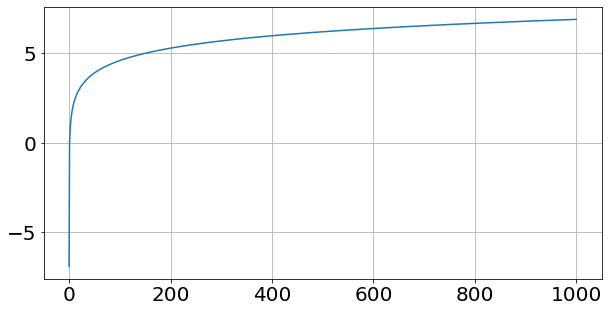

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(x, y)
# plt.ylim(-5, 10)
plt.grid()
plt.show()

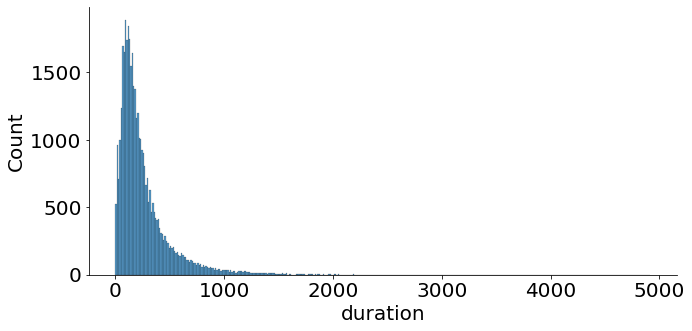

In [50]:
df = pd.read_csv("train_data.csv", sep=",", index_col=0)
data = df["duration"]
sns.displot(data, height=5, aspect=2)

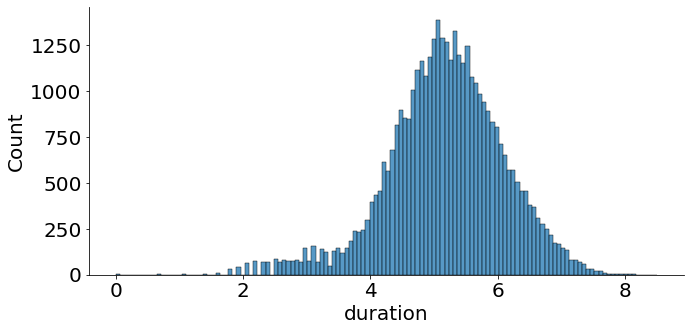

In [51]:
data2 = np.log(data + 1)
sns.displot(data2, height=5, aspect=2)